In [2]:
import pandas as pd
from Bio import Entrez, SeqIO

Entrez.email = "lsingh@intbio.org"

In [18]:
species = "Dog"
genes_vgnc_merged = pd.read_csv(f"{species}_genes_vgnc.csv")
genes_vgnc_merged["ncbi_id"] = genes_vgnc_merged["ncbi_id"].astype("Int64")
print(genes_vgnc_merged.shape)
genes_vgnc_merged.head()

(377, 19)


vgnc_id symbol                                 name prev_symbol  \
0  VGNC:83740   H1-0                  H1.0 linker histone         NaN   
1  VGNC:83740   H1-0                  H1.0 linker histone         NaN   
2  VGNC:83740   H1-0                  H1.0 linker histone         NaN   
3  VGNC:83712   H1-1  H1.1 linker histone, cluster member         NaN   
4  VGNC:83712   H1-1  H1.1 linker histone, cluster member         NaN   

  prev_name  ncbi_id     ensembl_gene_id uniprot_ids  \
0       NaN   610251  ENSCAFG00000046116  A0A5F4D9L8   
1       NaN   610251  ENSCAFG00000046116  A0A5F4D9L8   
2       NaN   610251  ENSCAFG00000046116  A0A5F4D9L8   
3       NaN   488258  ENSCAFG00000024309         NaN   
4       NaN   488258  ENSCAFG00000024309         NaN   

  Human gene ortholog HGNC ID Species  taxon_id       accession  \
0                   HGNC:4714     Dog      9615  XP_038534776.1   
1                   HGNC:4714     Dog      9615  XP_005625954.1   
2                   HGNC:4714     Dog      9615  XP_038405452.1   
3                   HGNC:4715     Dog      9615  XP_038302467.1   
4                   HGNC:4715     Dog      9615     XP_545380.1   

                                            sequence       refseq_id  \
0  MTENSTSTPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSS...  XP_038534776.1   
1  MTENSTSTPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSS...  XP_005625954.1   
2  MTENSTSTPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSS...  XP_038405452.1   
3  MSETAPPAPATSTPPEKPAAGKKAKRPAKSAAAAKKKSTGPSVSEL...  XP_038302467.1   
4  MSETAPPAPATSTPPEKPAAGKKAKRPAKSAAAAKKKSTGPSVSEL...     XP_545380.1   

  HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
0        H1-0                           NaN            H1.0           H1   
1        H1-0                           NaN            H1.0           H1   
2        H1-0                           NaN            H1.0           H1   
3        H1-1                           NaN            H1.1           H1   
4        H1-1                           NaN            H1.1           H1   

  comment  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

# Add comment feild

In [4]:
genes_vgnc_merged.at[
    genes_vgnc_merged[genes_vgnc_merged["ncbi_id"] == 100856099].index[0], "comment"
] = "not in current annotation release"
genes_vgnc_merged.at[
    genes_vgnc_merged[genes_vgnc_merged["ncbi_id"] == 100856116].index[0], "comment"
] = "not in current annotation release"
genes_vgnc_merged.at[
    genes_vgnc_merged[genes_vgnc_merged["ncbi_id"] == 111093988].index[0], "comment"
] = "not in current annotation release"

genes_vgnc_merged[genes_vgnc_merged["ncbi_id"].isin([100856099, 100856116, 111093988])]

vgnc_id symbol                     name prev_symbol prev_name  \
227  VGNC:83755  H2BC5  H2B clustered histone 5         NaN       NaN   
228  VGNC:83754  H2BC6  H2B clustered histone 6         NaN       NaN   
275  VGNC:83856   H3C2   H3 clustered histone 2         NaN       NaN   

       ncbi_id ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
227  100856099             NaN         NaN                   HGNC:4747   
228  100856116             NaN         NaN                   HGNC:4753   
275  111093988             NaN         NaN                   HGNC:4776   

    Species  taxon_id       accession  \
227     Dog      9615  XP_003640205.1   
228     Dog      9615  XP_003640206.1   
275     Dog      9615  XP_022270157.1   

                                              sequence refseq_id HGNC symbol  \
227  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...       NaN       H2BC5   
228  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...       NaN       H2BC6   
275  MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...       NaN        H3C2   

    Clustered (canonical) isoform Histone variant Histone type  \
227                     isoform_4   clustered H2B          H2B   
228                     isoform_3   clustered H2B          H2B   
275                     isoform_1  clustered H3.1           H3   

                               comment  
227  not in current annotation release  
228  not in current annotation release  
275  not in current annotation release

# Add other genes not annotated in current release

- H2AC18 ncbi record not in current annotation release (protein suppressed record XP_850808.1 from previous annotation release)
- H2AC7 ncbi record not in current annotation release (protein suppressed record XP_013966033.1 from previous annotation release)
- H2BW1 ncbi record not in current annotation release (protein suppressed record XP_013966933.1 from previous annotation release)
- H4C14 ncbi record not in current annotation release (protein suppressed record XP_022260662.1 from previous annotation release)
- H4C19 ncbi record not in current annotation release (protein suppressed record XP_022270233.1 from previous annotation release)

In [5]:
genes_vgnc_merged[
    genes_vgnc_merged["symbol"].isin(["H2AC18", "H2AC7", "H2BW1", "H4C14", "H4C19"])
]

vgnc_id  symbol                      name prev_symbol prev_name  \
62   VGNC:83737  H2AC18  H2A clustered histone 18         NaN       NaN   
83   VGNC:95372   H2AC7   H2A clustered histone 7         NaN       NaN   
242  VGNC:83733   H2BW1           H2B.W histone 1         NaN       NaN   
292  VGNC:83702   H4C14   H4 clustered histone 14         NaN       NaN   
296  VGNC:84557   H4C19   H4 clustered histone 19         NaN       NaN   

       ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
62      608631  ENSCAFG00000043458      J9P0L5                   HGNC:4736   
83   106558252  ENSCAFG00000043442      J9JHP2                   HGNC:4729   
242     491396  ENSCAFG00000015167      E2RH15                  HGNC:27252   
292     483167  ENSCAFG00000024573         NaN                   HGNC:4794   
296  100856216  ENSCAFG00000031940         NaN                         NaN   

    Species  taxon_id accession sequence refseq_id HGNC symbol  \
62      Dog      9615       NaN      NaN       NaN      H2AC18   
83      Dog      9615       NaN      NaN       NaN       H2AC7   
242     Dog      9615       NaN      NaN       NaN       H2BW1   
292     Dog      9615       NaN      NaN       NaN       H4C14   
296     Dog      9615       NaN      NaN       NaN         NaN   

    Clustered (canonical) isoform Histone variant Histone type comment  
62                      isoform_8   clustered H2A          H2A     NaN  
83                      isoform_4   clustered H2A          H2A     NaN  
242                           NaN           H2B.W          H2B     NaN  
292                     isoform_1    clustered H4           H4     NaN  
296                           NaN    clustered H4           H4     NaN

In [8]:
for s, acc in zip(
    ["H2AC18", "H2AC7", "H2BW1", "H4C14", "H4C19"],
    [
        "XP_850808.1",
        "XP_013966033.1",
        "XP_013966933.1",
        "XP_022260662.1",
        "XP_022270233.1",
    ],
):
    idx = genes_vgnc_merged[genes_vgnc_merged["symbol"] == s].index[0]
    genes_vgnc_merged.at[idx, "comment"] = "not in current annotation release"
    genes_vgnc_merged.at[idx, "accession"] = acc
    with Entrez.efetch(db="protein", id=acc, rettype="gb", retmode="text") as handle:
        protein_record = SeqIO.read(handle, "genbank")
    genes_vgnc_merged.at[idx, "sequence"] = str(protein_record.seq)

genes_vgnc_merged[
    genes_vgnc_merged["symbol"].isin(["H2AC18", "H2AC7", "H2BW1", "H4C14", "H4C19"])
]

vgnc_id  symbol                      name prev_symbol prev_name  \
62   VGNC:83737  H2AC18  H2A clustered histone 18         NaN       NaN   
83   VGNC:95372   H2AC7   H2A clustered histone 7         NaN       NaN   
242  VGNC:83733   H2BW1           H2B.W histone 1         NaN       NaN   
292  VGNC:83702   H4C14   H4 clustered histone 14         NaN       NaN   
296  VGNC:84557   H4C19   H4 clustered histone 19         NaN       NaN   

       ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
62      608631  ENSCAFG00000043458      J9P0L5                   HGNC:4736   
83   106558252  ENSCAFG00000043442      J9JHP2                   HGNC:4729   
242     491396  ENSCAFG00000015167      E2RH15                  HGNC:27252   
292     483167  ENSCAFG00000024573         NaN                   HGNC:4794   
296  100856216  ENSCAFG00000031940         NaN                         NaN   

    Species  taxon_id       accession  \
62      Dog      9615     XP_850808.1   
83      Dog      9615  XP_013966033.1   
242     Dog      9615  XP_013966933.1   
292     Dog      9615  XP_022260662.1   
296     Dog      9615  XP_022270233.1   

                                              sequence refseq_id HGNC symbol  \
62   MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGA...       NaN      H2AC18   
83   MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGA...       NaN       H2AC7   
242  MAEPGCETSSEECLGTKEPREAEPETPKRKKPRRQCHRRCRRSRSD...       NaN       H2BW1   
292  MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKR...       NaN       H4C14   
296  MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...       NaN         NaN   

    Clustered (canonical) isoform Histone variant Histone type  \
62                      isoform_8   clustered H2A          H2A   
83                      isoform_4   clustered H2A          H2A   
242                           NaN           H2B.W          H2B   
292                     isoform_1    clustered H4           H4   
296                           NaN    clustered H4           H4   

                               comment  
62   not in current annotation release  
83   not in current annotation release  
242  not in current annotation release  
292  not in current annotation release  
296  not in current annotation release

# Curate isoforms

In [10]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
genes_vgnc_merged_clustered.head()

vgnc_id  symbol                      name prev_symbol prev_name  \
38  VGNC:83710   H2AC1   H2A clustered histone 1         NaN       NaN   
39  VGNC:83710   H2AC1   H2A clustered histone 1         NaN       NaN   
40  VGNC:83710   H2AC1   H2A clustered histone 1         NaN       NaN   
41  VGNC:83775  H2AC10  H2A clustered histone 10         NaN       NaN   
42  VGNC:83722  H2AC11  H2A clustered histone 11         NaN       NaN   

    ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
38   488251  ENSCAFG00000024315      F1P7D1                  HGNC:18729   
39   488251  ENSCAFG00000024315      F1P7D1                  HGNC:18729   
40   488251  ENSCAFG00000024315      F1P7D1                  HGNC:18729   
41     <NA>  ENSCAFG00000029260         NaN                   HGNC:4732   
42   488289  ENSCAFG00000030507      J9P5B1                   HGNC:4737   

   Species  taxon_id       accession  \
38     Dog      9615  XP_038302442.1   
39     Dog      9615     XP_545373.2   
40     Dog      9615  XP_038440237.1   
41     Dog      9615             NaN   
42     Dog      9615  XP_038302530.1   

                                             sequence       refseq_id  \
38  MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_038302442.1   
39  MTSVQPQRYSSLVPALTAPLSRLRRVTERRSSVGRAVFIGTALQSA...     XP_545373.2   
40  MSGRGKQGGKARAKAKTRSSQGRACQFPVGRVHRLLRKGNYAERVG...  XP_038440237.1   
41                                                NaN             NaN   
42  MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYSERVGA...  XP_038302530.1   

   HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
38       H2AC1                     isoform_1   clustered H2A          H2A   
39       H2AC1                     isoform_1   clustered H2A          H2A   
40       H2AC1                     isoform_1   clustered H2A          H2A   
41         NaN                           NaN   clustered H2A          H2A   
42      H2AC11                     isoform_5   clustered H2A          H2A   

   comment  
38     NaN  
39     NaN  
40     NaN  
41     NaN  
42     NaN

In [11]:
genes_vgnc_merged_clustered[
    genes_vgnc_merged_clustered["Clustered (canonical) isoform"].isna()
]

vgnc_id  symbol                      name prev_symbol  \
41   VGNC:83775  H2AC10  H2A clustered histone 10         NaN   
64   VGNC:83713   H2AC2   H2A clustered histone 2         NaN   
77   VGNC:83715   H2AC5   H2A clustered histone 5         NaN   
78   VGNC:83715   H2AC5   H2A clustered histone 5         NaN   
79   VGNC:83715   H2AC5   H2A clustered histone 5         NaN   
88   VGNC:83770   H2AC9   H2A clustered histone 9         NaN   
202  VGNC:83703  H2BC19  H2B clustered histone 19         NaN   
203  VGNC:83703  H2BC19  H2B clustered histone 19         NaN   
204  VGNC:83703  H2BC19  H2B clustered histone 19         NaN   
205  VGNC:83714   H2BC2   H2B clustered histone 2         NaN   
206  VGNC:83714   H2BC2   H2B clustered histone 2         NaN   
207  VGNC:83714   H2BC2   H2B clustered histone 2         NaN   
208  VGNC:83705  H2BC20  H2B clustered histone 20         NaN   
209  VGNC:83705  H2BC20  H2B clustered histone 20         NaN   
210  VGNC:83705  H2BC20  H2B clustered histone 20         NaN   
214  VGNC:95376  H2BC25  H2B clustered histone 25         NaN   
218  VGNC:83744  H2BC27  H2B clustered histone 27      H2BU2    
219  VGNC:83744  H2BC27  H2B clustered histone 27      H2BU2    
220  VGNC:83744  H2BC27  H2B clustered histone 27      H2BU2    
282  VGNC:95374    H3C5    H3 clustered histone 5         NaN   
296  VGNC:84557   H4C19   H4 clustered histone 19         NaN   

           prev_name    ncbi_id     ensembl_gene_id uniprot_ids  \
41               NaN       <NA>  ENSCAFG00000029260         NaN   
64               NaN     488254  ENSCAFG00000044672  A0A5F4CUQ0   
77               NaN     488262  ENSCAFG00000031754         NaN   
78               NaN     488262  ENSCAFG00000031754         NaN   
79               NaN     488262  ENSCAFG00000031754         NaN   
88               NaN  111094037  ENSCAFG00000045621  A0A5F4CVY2   
202              NaN     483169                 NaN         NaN   
203              NaN     483169                 NaN         NaN   
204              NaN     483169                 NaN         NaN   
205              NaN     488253  ENSCAFG00000029445      L7N0C3   
206              NaN     488253  ENSCAFG00000029445      L7N0C3   
207              NaN     488253  ENSCAFG00000029445      L7N0C3   
208              NaN     483170  ENSCAFG00000045037         NaN   
209              NaN     483170  ENSCAFG00000045037         NaN   
210              NaN     483170  ENSCAFG00000045037         NaN   
214              NaN     611113                 NaN         NaN   
218  H2B.U histone 2  100683643  ENSCAFG00000024336      F1P782   
219  H2B.U histone 2  100683643  ENSCAFG00000024336      F1P782   
220  H2B.U histone 2  100683643  ENSCAFG00000024336      F1P782   
282              NaN       <NA>  ENSCAFG00000042480  A0A5F4DGH0   
296              NaN  100856216  ENSCAFG00000031940         NaN   

    Human gene ortholog HGNC ID Species  taxon_id       accession  \
41                    HGNC:4732     Dog      9615             NaN   
64                   HGNC:18720     Dog      9615     XP_545376.3   
77                    HGNC:4728     Dog      9615  XP_038302476.1   
78                    HGNC:4728     Dog      9615  XP_013966034.1   
79                    HGNC:4728     Dog      9615  XP_038440276.1   
88                   HGNC:18805     Dog      9615  NP_001361454.2   
202                  HGNC:20517     Dog      9615  XP_038278941.1   
203                  HGNC:20517     Dog      9615     XP_849728.1   
204                  HGNC:20517     Dog      9615  XP_038418005.1   
205                  HGNC:18719     Dog      9615  XP_038302444.1   
206                  HGNC:18719     Dog      9615  XP_022270208.1   
207                  HGNC:18719     Dog      9615  XP_038440244.1   
208                  HGNC:20516     Dog      9615  XP_038278938.1   
209                  HGNC:20516     Dog      9615  XP_005630795.1   
210                  HGNC:20516     Dog      9615  XP_038418006.1  

In [12]:
genes_vgnc_merged_clustered[genes_vgnc_merged_clustered["sequence"].isna()]

vgnc_id  symbol                      name prev_symbol prev_name  \
41   VGNC:83775  H2AC10  H2A clustered histone 10         NaN       NaN   
276  VGNC:83771    H3C3    H3 clustered histone 3         NaN       NaN   
282  VGNC:95374    H3C5    H3 clustered histone 5         NaN       NaN   
283  VGNC:95378    H3C6    H3 clustered histone 6         NaN       NaN   
286  VGNC:83768    H4C1    H4 clustered histone 1         NaN       NaN   
298  VGNC:83773    H4C3    H4 clustered histone 3         NaN       NaN   
303  VGNC:83772    H4C7    H4 clustered histone 7         NaN       NaN   

     ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
41      <NA>  ENSCAFG00000029260         NaN                   HGNC:4732   
276     <NA>  ENSCAFG00000040996         NaN                   HGNC:4768   
282     <NA>  ENSCAFG00000042480  A0A5F4DGH0                  HGNC:54427   
283     <NA>  ENSCAFG00000049134         NaN                   HGNC:4769   
286     <NA>  ENSCAFG00000029032         NaN                   HGNC:4781   
298     <NA>  ENSCAFG00000029110         NaN                   HGNC:4787   
303     <NA>  ENSCAFG00000024275      L7N0L3                   HGNC:4792   

    Species  taxon_id accession sequence refseq_id HGNC symbol  \
41      Dog      9615       NaN      NaN       NaN         NaN   
276     Dog      9615       NaN      NaN       NaN        H3C3   
282     Dog      9615       NaN      NaN       NaN         NaN   
283     Dog      9615       NaN      NaN       NaN        H3C6   
286     Dog      9615       NaN      NaN       NaN        H4C1   
298     Dog      9615       NaN      NaN       NaN        H4C3   
303     Dog      9615       NaN      NaN       NaN        H4C7   

    Clustered (canonical) isoform  Histone variant Histone type comment  
41                            NaN    clustered H2A          H2A     NaN  
276                     isoform_1   clustered H3.1           H3     NaN  
282                           NaN     clustered H3           H3     NaN  
283                     isoform_1   clustered H3.1           H3     NaN  
286                     isoform_1     clustered H4           H4     NaN  
298                     isoform_1     clustered H4           H4     NaN  
303                     isoform_2  clustered H4(?)           H4     NaN

In [13]:
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        print(s, f, v)

-----------------------------------------
H4C11 isoform_1 clustered H4
H4C11 isoform_1 clustered H4
-----------------------------------------
H2BC25 nan clustered H2B
-----------------------------------------
H3C1 isoform_1 clustered H3.1
H3C1 isoform_1 clustered H3.1
H3C1 isoform_1 clustered H3.1
H3C10 isoform_1 clustered H3.1
H3C10 isoform_1 clustered H3.1
H3C11 isoform_1 clustered H3.1
H3C12 isoform_1 clustered H3.1
H3C12 isoform_1 clustered H3.1
H3C2 isoform_1 clustered H3.1
H3C7 isoform_1 clustered H3.1
H3C8 isoform_1 clustered H3.1
-----------------------------------------
H4C19 nan clustered H4
-----------------------------------------
H4C2 isoform_1 clustered H4
-----------------------------------------
H3C13 isoform_1 clustered H3.2
H3C13 isoform_1 clustered H3.2
H3C13 isoform_1 clustered H3.2
H3C13 isoform_1 clustered H3.2
H3C13 isoform_1 clustered H3.2
H3C13 isoform_1 clustered H3.2
-----------------------------------------
H3C14 isoform_2 clustered H3.2
H3C15 isoform_2 clus

## Focus on H3 clustered

In [14]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H3"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
-----------------------------------------
H3C1 isoform_1 clustered H3.1
H3C1 isoform_1 clustered H3.1
H3C1 isoform_1 clustered H3.1
H3C10 isoform_1 clustered H3.1
H3C10 isoform_1 clustered H3.1
H3C11 isoform_1 clustered H3.1
H3C12 isoform_1 clustered H3.1
H3C12 isoform_1 clustered H3.1
H3C2 isoform_1 clustered H3.1
H3C7 isoform_1 clustered H3.1
H3C8 isoform_1 clustered H3.1
-----------------------------------------
-----------------------------------------
-----------------------------------------
H3C13 isoform_1 clustered H3.2
H3C13 isoform_1 clustered H3.2
H3C13 isoform_1 clustered H3.2
H3C13 isoform_1 clustered H3.2
H3C13 isoform_1 clustered H3.2
H3C13 isoform_1 clustered H3.2
-----------------------------------------
H3C14 isoform_2 clustered H3.2
H3C15 isoform_2 clustered H3.2
-----------------------------------------
H3C4 isoform_2 clustered H3.1
H3C4 isoform_2 clustered H3.1
H3C4 isoform_2 cluste

## Isoforms of H3 already curated

## Focus on H2B clustered

In [15]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2B"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
H2BC25 nan clustered H2B
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
H2BC10 isoform_3 clustered H2B
-----------------------------------------
H2BC10 isoform_3 clustered H2B
-----------------------------------------
H2BC10 isoform_3 clustered H2B
-----------------------------------------
H2BC26 isoform_15 clustered H2B
H2BC26 isoform_15 clustered H2B
H2BC26 isoform_15 clustered H2B
-----------------------------------------
H2BC18 isoform_12 clustered H2B
H2BC18 isoform_13 clustered H2B
H2BC18 isoform_12 clustered H2B
H2BC18 isoform_13 clustered H2B
H2BC18 isoform_12 clustered H2B
H2BC18 isoform_13 clustered H2B
------

### H2BC25

In [16]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC25"])]

vgnc_id  symbol                      name prev_symbol prev_name  \
214  VGNC:95376  H2BC25  H2B clustered histone 25         NaN       NaN   

     ncbi_id ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID Species  \
214   611113             NaN         NaN                         NaN     Dog   

     taxon_id       accession  \
214      9615  XP_005640169.2   

                                              sequence       refseq_id  \
214  MARGANEVLKTDSIYVYKVLKQVHPDTGISSKAMGIMNSFVNDIFE...  XP_005640169.2   

    HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
214         NaN                           NaN   clustered H2B          H2B   

    comment  
214     NaN

In [17]:
genes_vgnc_merged.at[214, "Clustered (canonical) isoform"] = "isoform_16"

### Return to H2B clustered

In [18]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2B"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
H2BC25 isoform_1 clustered H2B
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
H2BC10 isoform_3 clustered H2B
-----------------------------------------
H2BC10 isoform_3 clustered H2B
-----------------------------------------
H2BC10 isoform_3 clustered H2B
-----------------------------------------
H2BC26 isoform_15 clustered H2B
H2BC26 isoform_15 clustered H2B
H2BC26 isoform_15 clustered H2B
-----------------------------------------
H2BC18 isoform_12 clustered H2B
H2BC18 isoform_13 clustered H2B
H2BC18 isoform_12 clustered H2B
H2BC18 isoform_13 clustered H2B
H2BC18 isoform_12 clustered H2B
H2BC18 isoform_13 clustered H2B


### H2BC10

In [19]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC8", "H2BC10"])].head(4)

vgnc_id  symbol                      name prev_symbol prev_name  \
174  VGNC:83721  H2BC10  H2B clustered histone 10         NaN       NaN   
175  VGNC:83721  H2BC10  H2B clustered histone 10         NaN       NaN   
176  VGNC:83721  H2BC10  H2B clustered histone 10         NaN       NaN   
232  VGNC:83753   H2BC8   H2B clustered histone 8         NaN       NaN   

       ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
174     488279  ENSCAFG00000042028  A0A5F4CAF8                   HGNC:4756   
175     488279  ENSCAFG00000042028  A0A5F4CAF8                   HGNC:4756   
176     488279  ENSCAFG00000042028  A0A5F4CAF8                   HGNC:4756   
232  100856186  ENSCAFG00000031494         NaN                   HGNC:4746   

    Species  taxon_id       accession  \
174     Dog      9615  XP_038302547.1   
175     Dog      9615  XP_005640223.2   
176     Dog      9615  XP_038440416.1   
232     Dog      9615  XP_038302478.1   

                                              sequence       refseq_id  \
174  MGIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPG...  XP_038302547.1   
175  MGIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPG...  XP_005640223.2   
176  MIAQQQRTKEQESRPAKRKELNYYTLRRFRKAAYAVGTEEIPANQK...  XP_038440416.1   
232  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038302478.1   

    HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
174      H2BC10                     isoform_3   clustered H2B          H2B   
175      H2BC10                     isoform_3   clustered H2B          H2B   
176      H2BC10                     isoform_3   clustered H2B          H2B   
232       H2BC8                     isoform_3   clustered H2B          H2B   

    comment  
174     NaN  
175     NaN  
176     NaN  
232     NaN

**Исходя из данных RNA-seq, доступных в геномном браузере, вариант гена XP_038440416.1 не является корректным и повидимому все обнаруженные продукты являются одной изоформой, поэтому удалим эту запись**

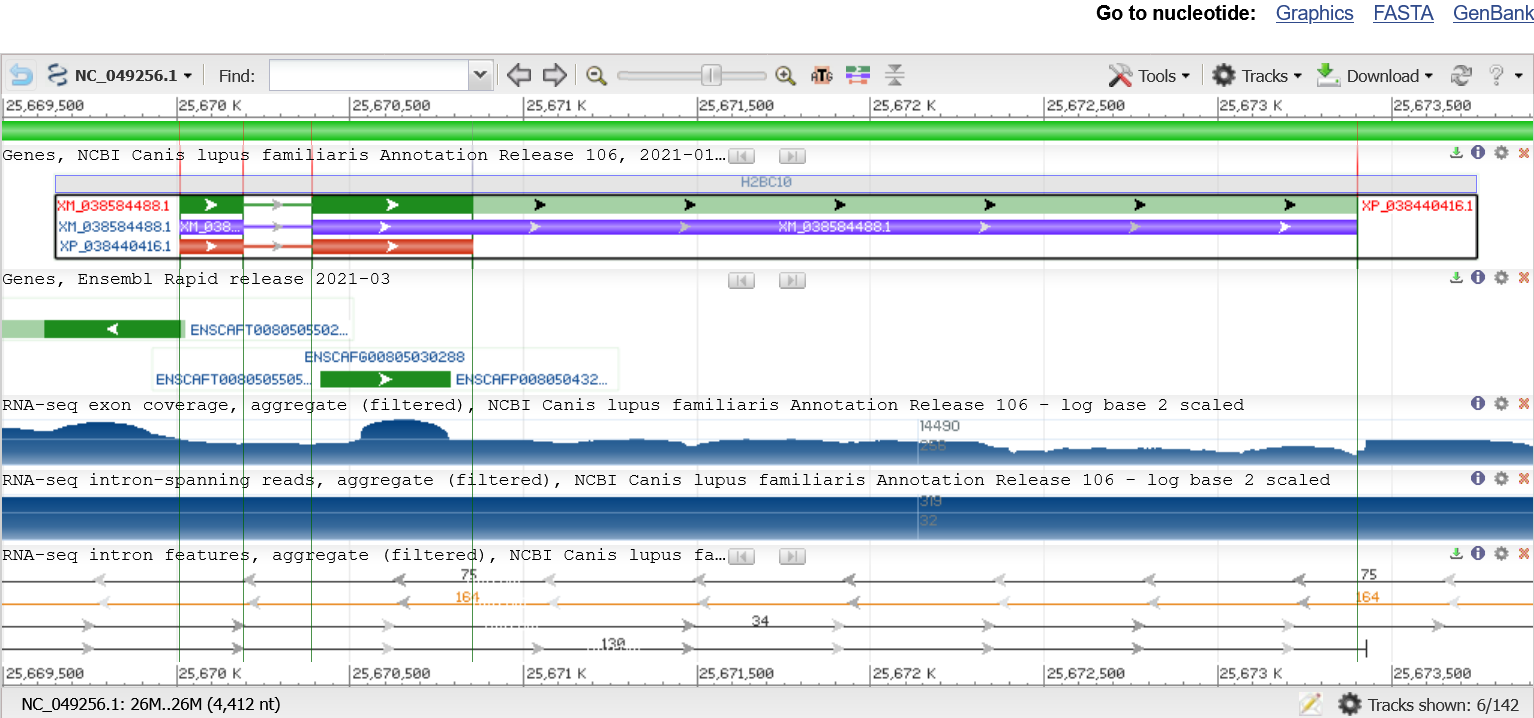

In [23]:
genes_vgnc_merged = genes_vgnc_merged[
    ~(genes_vgnc_merged["accession"] == "XP_038440416.1")
]
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC8", "H2BC10"])].head(3)

vgnc_id  symbol                      name prev_symbol prev_name  \
174  VGNC:83721  H2BC10  H2B clustered histone 10         NaN       NaN   
175  VGNC:83721  H2BC10  H2B clustered histone 10         NaN       NaN   
232  VGNC:83753   H2BC8   H2B clustered histone 8         NaN       NaN   

       ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
174     488279  ENSCAFG00000042028  A0A5F4CAF8                   HGNC:4756   
175     488279  ENSCAFG00000042028  A0A5F4CAF8                   HGNC:4756   
232  100856186  ENSCAFG00000031494         NaN                   HGNC:4746   

    Species  taxon_id       accession  \
174     Dog      9615  XP_038302547.1   
175     Dog      9615  XP_005640223.2   
232     Dog      9615  XP_038302478.1   

                                              sequence       refseq_id  \
174  MGIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPG...  XP_038302547.1   
175  MGIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPG...  XP_005640223.2   
232  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038302478.1   

    HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
174      H2BC10                     isoform_3   clustered H2B          H2B   
175      H2BC10                     isoform_3   clustered H2B          H2B   
232       H2BC8                     isoform_3   clustered H2B          H2B   

    comment  
174     NaN  
175     NaN  
232     NaN

**Между двумя оставшимися продуктами гена H2BC10 наблюдаются различия в последней аминокислоте:**

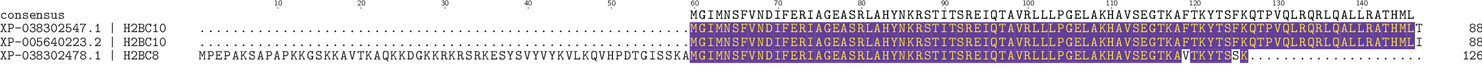

Стоит выдать им имена isoform_4 и isoform_5

### Add new H2B isoforms isoform_4 and isoform_5

In [ ]:
# Шаг 1: Выбираем только строки с "clustered H2B"
mask = (genes_vgnc_merged["Histone variant"] == "clustered H2B") & (
    ~genes_vgnc_merged["Clustered (canonical) isoform"].isna()
)
clustered_data = genes_vgnc_merged[mask].copy()

# Шаг 2: Создаем словарь для переименования (старый номер → новый номер)
iso_dict = {}
for iso in clustered_data["Clustered (canonical) isoform"].unique():
    num = int(iso.split("_")[1])
    new_num = num + 1 if num >= 6 else num  # Увеличиваем на +1 только если номер ≥ 6
    iso_dict[iso] = f"isoform_{new_num}"

# Шаг 3: Обновляем изоформы в исходной таблице
genes_vgnc_merged.loc[mask, "Clustered (canonical) isoform"] = genes_vgnc_merged.loc[
    mask, "Clustered (canonical) isoform"
].map(iso_dict)

In [ ]:
genes_vgnc_merged[genes_vgnc_merged["Histone variant"].isin(["clustered H2B"])]

In [ ]:
genes_vgnc_merged.at[174, "Clustered (canonical) isoform"] = "isoform_4"
genes_vgnc_merged.at[175, "Clustered (canonical) isoform"] = "isoform_5"
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC10"])]

### Return to H2B clustered

In [ ]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2B"):
            print(s, f, v)

### H2BC18

In [ ]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC18"])]

**Все 3 последовательности - одна изоформа**

In [ ]:
genes_vgnc_merged = genes_vgnc_merged[
    genes_vgnc_merged["Clustered (canonical) isoform"] != "isoform_14"
]
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC18"])]

In [ ]:
# Так как isoform_14 удалена, остальные идентификаторы сместим на -1

# Шаг 1: Выбираем только строки с "clustered H2B"
mask = (genes_vgnc_merged["Histone variant"] == "clustered H2B") & (
    ~genes_vgnc_merged["Clustered (canonical) isoform"].isna()
)
clustered_data = genes_vgnc_merged[mask].copy()

# Шаг 2: Создаем словарь для переименования (старый номер → новый номер)
iso_dict = {}
for iso in clustered_data["Clustered (canonical) isoform"].unique():
    num = int(iso.split("_")[1])
    new_num = num - 1 if num >= 15 else num  # Увеличиваем на -1 только если номер ≥ 15
    iso_dict[iso] = f"isoform_{new_num}"

# Шаг 3: Обновляем изоформы в исходной таблице
genes_vgnc_merged.loc[mask, "Clustered (canonical) isoform"] = genes_vgnc_merged.loc[
    mask, "Clustered (canonical) isoform"
].map(iso_dict)

### Return to H2B clustered

In [7]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2B"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
H2BC25 isoform_16 clustered H2B
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
H2BC10 isoform_5 clustered H2B
-----------------------------------------
H2BC10 isoform_4 clustered H2B
-----------------------------------------
H2BC26 isoform_15 clustered H2B
H2BC26 isoform_15 clustered H2B
H2BC26 isoform_15 clustered H2B
-----------------------------------------
H2BC18 isoform_13 clustered H2B
H2BC18 isoform_13 clustered H2B
H2BC18 isoform_13 clustered H2B
-----------------------------------------
H2BC2 nan clustered H2B
-----------------------------------------
H2BC1 isoform_1 clustered H2B
H2BC1 isoform_1 clustered H2B


### H2BC2

In [20]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC1", "H2BC2"])]

vgnc_id symbol                     name prev_symbol prev_name  \
171  VGNC:83711  H2BC1  H2B clustered histone 1         NaN       NaN   
172  VGNC:83711  H2BC1  H2B clustered histone 1         NaN       NaN   
173  VGNC:83711  H2BC1  H2B clustered histone 1         NaN       NaN   
201  VGNC:83714  H2BC2  H2B clustered histone 2         NaN       NaN   
202  VGNC:83714  H2BC2  H2B clustered histone 2         NaN       NaN   
203  VGNC:83714  H2BC2  H2B clustered histone 2         NaN       NaN   

     ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
171   488252                 NaN         NaN                  HGNC:18730   
172   488252                 NaN         NaN                  HGNC:18730   
173   488252                 NaN         NaN                  HGNC:18730   
201   488253  ENSCAFG00000029445      L7N0C3                  HGNC:18719   
202   488253  ENSCAFG00000029445      L7N0C3                  HGNC:18719   
203   488253  ENSCAFG00000029445      L7N0C3                  HGNC:18719   

    Species  taxon_id       accession  \
171     Dog      9615  XP_038302443.1   
172     Dog      9615     XP_545374.3   
173     Dog      9615  XP_038440238.1   
201     Dog      9615  XP_038302444.1   
202     Dog      9615  XP_022270208.1   
203     Dog      9615  XP_038440244.1   

                                              sequence       refseq_id  \
171  MPELTSKGTTISKKGFKRAVAKTQKKEGKKRRRCRKESYSIYIYKV...  XP_038302443.1   
172  MPELTSKGTTISKKGFKRAVAKTQKKEGKKRRRCRKESYSIYIYKV...     XP_545374.3   
173  MPELTSKGTTISKKGFKRAVAKTQKKXGKKRRRCRKESYSIYIYKV...  XP_038440238.1   
201  MPELTSKGTTISKKGFKRAVAKTQKKEGKKRRRCRKESYSIYIYKV...  XP_038302444.1   
202  MPELTSKGTTISKKGFKRAVAKTQKKEGKKRRRCRKESYSIYIYKV...  XP_022270208.1   
203  MPELTSKGTTISKKGFKRAVAKTQKKEGKKRRRCRKESYSIYIYKV...  XP_038440244.1   

    HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
171       H2BC1                     isoform_1   clustered H2B          H2B   
172       H2BC1                     isoform_1   clustered H2B          H2B   
173       H2BC1                     isoform_1   clustered H2B          H2B   
201         NaN                           NaN   clustered H2B          H2B   
202         NaN                           NaN   clustered H2B          H2B   
203         NaN                           NaN   clustered H2B          H2B   

    comment  
171     NaN  
172     NaN  
173     NaN  
201     NaN  
202     NaN  
203     NaN

**Все идентификаторы accession продуктов получены из разных сборок.**
**Будем считать, что ген H2BC1 имеет одну изоформу, а ген H2BC2 имеет 2 изоформы**

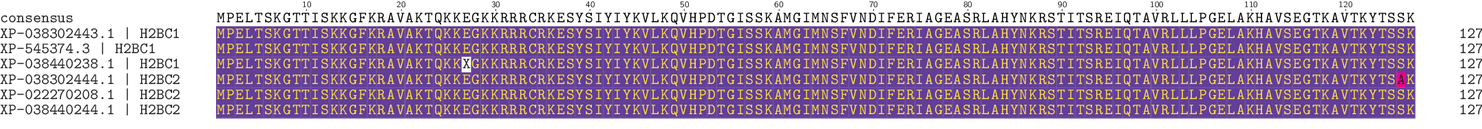

In [21]:
genes_vgnc_merged.at[173, "sequence"] = genes_vgnc_merged.loc[172, "sequence"]

In [22]:
genes_vgnc_merged.at[202, "Clustered (canonical) isoform"] = "isoform_1"
genes_vgnc_merged.at[203, "Clustered (canonical) isoform"] = "isoform_1"

### Add new H2B isoform isoform_2

In [23]:
# Шаг 1: Выбираем только строки с "clustered H2B"
mask = (genes_vgnc_merged["Histone variant"] == "clustered H2B") & (
    ~genes_vgnc_merged["Clustered (canonical) isoform"].isna()
)
clustered_data = genes_vgnc_merged[mask].copy()

# Шаг 2: Создаем словарь для переименования (старый номер → новый номер)
iso_dict = {}
for iso in clustered_data["Clustered (canonical) isoform"].unique():
    num = int(iso.split("_")[1])
    new_num = num + 1 if num >= 2 else num  # Увеличиваем на +1 только если номер ≥ 2
    iso_dict[iso] = f"isoform_{new_num}"

# Шаг 3: Обновляем изоформы в исходной таблице
genes_vgnc_merged.loc[mask, "Clustered (canonical) isoform"] = genes_vgnc_merged.loc[
    mask, "Clustered (canonical) isoform"
].map(iso_dict)

In [24]:
genes_vgnc_merged.at[201, "Clustered (canonical) isoform"] = "isoform_2"
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC1", "H2BC2"])]

vgnc_id symbol                     name prev_symbol prev_name  \
171  VGNC:83711  H2BC1  H2B clustered histone 1         NaN       NaN   
172  VGNC:83711  H2BC1  H2B clustered histone 1         NaN       NaN   
173  VGNC:83711  H2BC1  H2B clustered histone 1         NaN       NaN   
201  VGNC:83714  H2BC2  H2B clustered histone 2         NaN       NaN   
202  VGNC:83714  H2BC2  H2B clustered histone 2         NaN       NaN   
203  VGNC:83714  H2BC2  H2B clustered histone 2         NaN       NaN   

     ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
171   488252                 NaN         NaN                  HGNC:18730   
172   488252                 NaN         NaN                  HGNC:18730   
173   488252                 NaN         NaN                  HGNC:18730   
201   488253  ENSCAFG00000029445      L7N0C3                  HGNC:18719   
202   488253  ENSCAFG00000029445      L7N0C3                  HGNC:18719   
203   488253  ENSCAFG00000029445      L7N0C3                  HGNC:18719   

    Species  taxon_id       accession  \
171     Dog      9615  XP_038302443.1   
172     Dog      9615     XP_545374.3   
173     Dog      9615  XP_038440238.1   
201     Dog      9615  XP_038302444.1   
202     Dog      9615  XP_022270208.1   
203     Dog      9615  XP_038440244.1   

                                              sequence       refseq_id  \
171  MPELTSKGTTISKKGFKRAVAKTQKKEGKKRRRCRKESYSIYIYKV...  XP_038302443.1   
172  MPELTSKGTTISKKGFKRAVAKTQKKEGKKRRRCRKESYSIYIYKV...     XP_545374.3   
173  MPELTSKGTTISKKGFKRAVAKTQKKEGKKRRRCRKESYSIYIYKV...  XP_038440238.1   
201  MPELTSKGTTISKKGFKRAVAKTQKKEGKKRRRCRKESYSIYIYKV...  XP_038302444.1   
202  MPELTSKGTTISKKGFKRAVAKTQKKEGKKRRRCRKESYSIYIYKV...  XP_022270208.1   
203  MPELTSKGTTISKKGFKRAVAKTQKKEGKKRRRCRKESYSIYIYKV...  XP_038440244.1   

    HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
171       H2BC1                     isoform_1   clustered H2B          H2B   
172       H2BC1                     isoform_1   clustered H2B          H2B   
173       H2BC1                     isoform_1   clustered H2B          H2B   
201         NaN                     isoform_2   clustered H2B          H2B   
202         NaN                     isoform_1   clustered H2B          H2B   
203         NaN                     isoform_1   clustered H2B          H2B   

    comment  
171     NaN  
172     NaN  
173     NaN  
201     NaN  
202     NaN  
203     NaN

### Return to H2B clustered

In [25]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2B"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
H2BC25 isoform_17 clustered H2B
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
H2BC10 isoform_6 clustered H2B
-----------------------------------------
H2BC10 isoform_5 clustered H2B
-----------------------------------------
H2BC26 isoform_16 clustered H2B
H2BC26 isoform_16 clustered H2B
H2BC26 isoform_16 clustered H2B
-----------------------------------------
H2BC18 isoform_14 clustered H2B
H2BC18 isoform_14 clustered H2B
H2BC18 isoform_14 clustered H2B
-----------------------------------------
H2BC2 isoform_2 clustered H2B
-----------------------------------------
H2BC1 isoform_1 clustered H2B
H2BC1 isoform_1 clustere

### H2BC19 & H2BC20

In [26]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC19", "H2BC20"])]

vgnc_id  symbol                      name prev_symbol prev_name  \
198  VGNC:83703  H2BC19  H2B clustered histone 19         NaN       NaN   
199  VGNC:83703  H2BC19  H2B clustered histone 19         NaN       NaN   
200  VGNC:83703  H2BC19  H2B clustered histone 19         NaN       NaN   
204  VGNC:83705  H2BC20  H2B clustered histone 20         NaN       NaN   
205  VGNC:83705  H2BC20  H2B clustered histone 20         NaN       NaN   
206  VGNC:83705  H2BC20  H2B clustered histone 20         NaN       NaN   

     ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
198   483169                 NaN         NaN                  HGNC:20517   
199   483169                 NaN         NaN                  HGNC:20517   
200   483169                 NaN         NaN                  HGNC:20517   
204   483170  ENSCAFG00000045037         NaN                  HGNC:20516   
205   483170  ENSCAFG00000045037         NaN                  HGNC:20516   
206   483170  ENSCAFG00000045037         NaN                  HGNC:20516   

    Species  taxon_id       accession  \
198     Dog      9615  XP_038278941.1   
199     Dog      9615     XP_849728.1   
200     Dog      9615  XP_038418005.1   
204     Dog      9615  XP_038278938.1   
205     Dog      9615  XP_005630795.1   
206     Dog      9615  XP_038418006.1   

                                              sequence       refseq_id  \
198  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...  XP_038278941.1   
199  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...     XP_849728.1   
200  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...  XP_038418005.1   
204  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...  XP_038278938.1   
205  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...  XP_005630795.1   
206  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...  XP_038418006.1   

    HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
198         NaN                           NaN   clustered H2B          H2B   
199         NaN                           NaN   clustered H2B          H2B   
200         NaN                           NaN   clustered H2B          H2B   
204         NaN                           NaN   clustered H2B          H2B   
205         NaN                           NaN   clustered H2B          H2B   
206         NaN                           NaN   clustered H2B          H2B   

    comment  
198     NaN  
199     NaN  
200     NaN  
204     NaN  
205     NaN  
206     NaN

In [27]:
for i, row in genes_vgnc_merged[
    genes_vgnc_merged["symbol"].isin(["H2BC19", "H2BC20"])
].iterrows():
    genes_vgnc_merged.at[i, "Clustered (canonical) isoform"] = "isoform_15"
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC19", "H2BC20"])]

vgnc_id  symbol                      name prev_symbol prev_name  \
198  VGNC:83703  H2BC19  H2B clustered histone 19         NaN       NaN   
199  VGNC:83703  H2BC19  H2B clustered histone 19         NaN       NaN   
200  VGNC:83703  H2BC19  H2B clustered histone 19         NaN       NaN   
204  VGNC:83705  H2BC20  H2B clustered histone 20         NaN       NaN   
205  VGNC:83705  H2BC20  H2B clustered histone 20         NaN       NaN   
206  VGNC:83705  H2BC20  H2B clustered histone 20         NaN       NaN   

     ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
198   483169                 NaN         NaN                  HGNC:20517   
199   483169                 NaN         NaN                  HGNC:20517   
200   483169                 NaN         NaN                  HGNC:20517   
204   483170  ENSCAFG00000045037         NaN                  HGNC:20516   
205   483170  ENSCAFG00000045037         NaN                  HGNC:20516   
206   483170  ENSCAFG00000045037         NaN                  HGNC:20516   

    Species  taxon_id       accession  \
198     Dog      9615  XP_038278941.1   
199     Dog      9615     XP_849728.1   
200     Dog      9615  XP_038418005.1   
204     Dog      9615  XP_038278938.1   
205     Dog      9615  XP_005630795.1   
206     Dog      9615  XP_038418006.1   

                                              sequence       refseq_id  \
198  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...  XP_038278941.1   
199  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...     XP_849728.1   
200  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...  XP_038418005.1   
204  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...  XP_038278938.1   
205  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...  XP_005630795.1   
206  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVL...  XP_038418006.1   

    HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
198         NaN                    isoform_15   clustered H2B          H2B   
199         NaN                    isoform_15   clustered H2B          H2B   
200         NaN                    isoform_15   clustered H2B          H2B   
204         NaN                    isoform_15   clustered H2B          H2B   
205         NaN                    isoform_15   clustered H2B          H2B   
206         NaN                    isoform_15   clustered H2B          H2B   

    comment  
198     NaN  
199     NaN  
200     NaN  
204     NaN  
205     NaN  
206     NaN

### Return to H2B clustered

In [28]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2B"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
H2BC25 isoform_17 clustered H2B
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
H2BC10 isoform_6 clustered H2B
-----------------------------------------
H2BC10 isoform_5 clustered H2B
-----------------------------------------
H2BC26 isoform_16 clustered H2B
H2BC26 isoform_16 clustered H2B
H2BC26 isoform_16 clustered H2B
-----------------------------------------
H2BC18 isoform_14 clustered H2B
H2BC18 isoform_14 clustered H2B
H2BC18 isoform_14 clustered H2B
-----------------------------------------
H2BC2 isoform_2 clustered H2B
-----------------------------------------
H2BC1 isoform_1 clustered H2B
H2BC1 isoform_1 clustere

### H2BC12 & H2BC15

In [29]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC12", "H2BC15"])]

vgnc_id  symbol                      name prev_symbol prev_name  \
179  VGNC:83726  H2BC12  H2B clustered histone 12         NaN       NaN   
180  VGNC:83726  H2BC12  H2B clustered histone 12         NaN       NaN   
181  VGNC:83726  H2BC12  H2B clustered histone 12         NaN       NaN   
188  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   
189  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   
190  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   
191  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   
192  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   
193  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   

     ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
179   488290  ENSCAFG00000028672         NaN                  HGNC:13954   
180   488290  ENSCAFG00000028672         NaN                  HGNC:13954   
181   488290  ENSCAFG00000028672         NaN                  HGNC:13954   
188   488303  ENSCAFG00000042780         NaN                   HGNC:4749   
189   488303  ENSCAFG00000042780         NaN                   HGNC:4749   
190   488303  ENSCAFG00000042780         NaN                   HGNC:4749   
191   488303  ENSCAFG00000042780         NaN                   HGNC:4749   
192   488303  ENSCAFG00000042780         NaN                   HGNC:4749   
193   488303  ENSCAFG00000042780         NaN                   HGNC:4749   

    Species  taxon_id       accession  \
179     Dog      9615  XP_038302526.1   
180     Dog      9615  XP_022270157.1   
181     Dog      9615  XP_038440334.1   
188     Dog      9615  XP_038302554.1   
189     Dog      9615  XP_038302553.1   
190     Dog      9615  XP_038318910.1   
191     Dog      9615     XP_859540.1   
192     Dog      9615  XP_038440364.1   
193     Dog      9615  XP_038440363.1   

                                              sequence       refseq_id  \
179  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038302526.1   
180  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038318981.1   
181  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038440334.1   
188  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038302554.1   
189  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038302553.1   
190  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038318910.1   
191  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...     XP_859540.1   
192  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038440364.1   
193  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038440363.1   

    HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
179      H2BC12                     isoform_9   clustered H2B          H2B   
180      H2BC12                     isoform_9   clustered H2B          H2B   
181      H2BC12                     isoform_9   clustered H2B          H2B   
188      H2BC15                    isoform_12   clustered H2B          H2B   
189      H2BC15                    isoform_12   clustered H2B          H2B   
190      H2BC15                    isoform_12   clustered H2B          H2B   
191      H2BC15                    isoform_12   clustered H2B          H2B   
192      H2BC15                    isoform_12   clustered H2B          H2B   
193      H2BC15                    isoform_12   clustered H2B          H2B   

    comment  
179     NaN  
180     NaN  
181     NaN  
188     NaN  
189     NaN  
190     NaN  
191     NaN  
192     NaN  
193     NaN

In [30]:
for i, row in genes_vgnc_merged[
    genes_vgnc_merged["symbol"].isin(["H2BC15"])
].iterrows():
    genes_vgnc_merged.at[i, "Clustered (canonical) isoform"] = "isoform_9"
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC12", "H2BC15"])]

vgnc_id  symbol                      name prev_symbol prev_name  \
179  VGNC:83726  H2BC12  H2B clustered histone 12         NaN       NaN   
180  VGNC:83726  H2BC12  H2B clustered histone 12         NaN       NaN   
181  VGNC:83726  H2BC12  H2B clustered histone 12         NaN       NaN   
188  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   
189  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   
190  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   
191  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   
192  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   
193  VGNC:83728  H2BC15  H2B clustered histone 15         NaN       NaN   

     ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
179   488290  ENSCAFG00000028672         NaN                  HGNC:13954   
180   488290  ENSCAFG00000028672         NaN                  HGNC:13954   
181   488290  ENSCAFG00000028672         NaN                  HGNC:13954   
188   488303  ENSCAFG00000042780         NaN                   HGNC:4749   
189   488303  ENSCAFG00000042780         NaN                   HGNC:4749   
190   488303  ENSCAFG00000042780         NaN                   HGNC:4749   
191   488303  ENSCAFG00000042780         NaN                   HGNC:4749   
192   488303  ENSCAFG00000042780         NaN                   HGNC:4749   
193   488303  ENSCAFG00000042780         NaN                   HGNC:4749   

    Species  taxon_id       accession  \
179     Dog      9615  XP_038302526.1   
180     Dog      9615  XP_022270157.1   
181     Dog      9615  XP_038440334.1   
188     Dog      9615  XP_038302554.1   
189     Dog      9615  XP_038302553.1   
190     Dog      9615  XP_038318910.1   
191     Dog      9615     XP_859540.1   
192     Dog      9615  XP_038440364.1   
193     Dog      9615  XP_038440363.1   

                                              sequence       refseq_id  \
179  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038302526.1   
180  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038318981.1   
181  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038440334.1   
188  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038302554.1   
189  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038302553.1   
190  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038318910.1   
191  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...     XP_859540.1   
192  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038440364.1   
193  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL...  XP_038440363.1   

    HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
179      H2BC12                     isoform_9   clustered H2B          H2B   
180      H2BC12                     isoform_9   clustered H2B          H2B   
181      H2BC12                     isoform_9   clustered H2B          H2B   
188      H2BC15                     isoform_9   clustered H2B          H2B   
189      H2BC15                     isoform_9   clustered H2B          H2B   
190      H2BC15                     isoform_9   clustered H2B          H2B   
191      H2BC15                     isoform_9   clustered H2B          H2B   
192      H2BC15                     isoform_9   clustered H2B          H2B   
193      H2BC15                     isoform_9   clustered H2B          H2B   

    comment  
179     NaN  
180     NaN  
181     NaN  
188     NaN  
189     NaN  
190     NaN  
191     NaN  
192     NaN  
193     NaN

In [31]:
# Так как isoform_12 удалена, остальные идентификаторы сместим на -1

# Шаг 1: Выбираем только строки с "clustered H2B"
mask = (genes_vgnc_merged["Histone variant"] == "clustered H2B") & (
    ~genes_vgnc_merged["Clustered (canonical) isoform"].isna()
)
clustered_data = genes_vgnc_merged[mask].copy()

# Шаг 2: Создаем словарь для переименования (старый номер → новый номер)
iso_dict = {}
for iso in clustered_data["Clustered (canonical) isoform"].unique():
    num = int(iso.split("_")[1])
    new_num = num - 1 if num >= 13 else num  # Увеличиваем на -1 только если номер ≥ 13
    iso_dict[iso] = f"isoform_{new_num}"

# Шаг 3: Обновляем изоформы в исходной таблице
genes_vgnc_merged.loc[mask, "Clustered (canonical) isoform"] = genes_vgnc_merged.loc[
    mask, "Clustered (canonical) isoform"
].map(iso_dict)

### Save to file

In [33]:
genes_vgnc_merged.to_csv(f"{species}_genes_vgnc.csv", index=False)

In [ ]:
import pandas as pd
from Bio import Entrez, SeqIO

Entrez.email = "lsingh@intbio.org"

species = "Dog"
genes_vgnc_merged = pd.read_csv(f"{species}_genes_vgnc.csv")
genes_vgnc_merged["ncbi_id"] = genes_vgnc_merged["ncbi_id"].astype("Int64")
print(genes_vgnc_merged.shape)
genes_vgnc_merged.head()

### Return to H2B clustered

In [34]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2B"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
H2BC25 isoform_16 clustered H2B
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
H2BC10 isoform_6 clustered H2B
-----------------------------------------
H2BC10 isoform_5 clustered H2B
-----------------------------------------
H2BC26 isoform_15 clustered H2B
H2BC26 isoform_15 clustered H2B
H2BC26 isoform_15 clustered H2B
-----------------------------------------
H2BC18 isoform_13 clustered H2B
H2BC18 isoform_13 clustered H2B
H2BC18 isoform_13 clustered H2B
-----------------------------------------
H2BC2 isoform_2 clustered H2B
-----------------------------------------
H2BC1 isoform_1 clustered H2B
H2BC1 isoform_1 clustere

### H2BC4-9, 13, 14, 17

In [37]:
curate_symbols = [f"H2BC{i}" for i in [4, 5, 6, 7, 8, 9, 13, 14, 17]]
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(curate_symbols)]

vgnc_id  symbol                      name prev_symbol prev_name  \
182  VGNC:83743  H2BC13  H2B clustered histone 13         NaN       NaN   
183  VGNC:83743  H2BC13  H2B clustered histone 13         NaN       NaN   
184  VGNC:83743  H2BC13  H2B clustered histone 13         NaN       NaN   
185  VGNC:83741  H2BC14  H2B clustered histone 14         NaN       NaN   
186  VGNC:83741  H2BC14  H2B clustered histone 14         NaN       NaN   
187  VGNC:83741  H2BC14  H2B clustered histone 14         NaN       NaN   
194  VGNC:83736  H2BC17  H2B clustered histone 17         NaN       NaN   
220  VGNC:83718   H2BC4   H2B clustered histone 4         NaN       NaN   
221  VGNC:83718   H2BC4   H2B clustered histone 4         NaN       NaN   
222  VGNC:83718   H2BC4   H2B clustered histone 4         NaN       NaN   
223  VGNC:83755   H2BC5   H2B clustered histone 5         NaN       NaN   
224  VGNC:83754   H2BC6   H2B clustered histone 6         NaN       NaN   
225  VGNC:83757   H2BC7   H2B clustered histone 7         NaN       NaN   
226  VGNC:83757   H2BC7   H2B clustered histone 7         NaN       NaN   
227  VGNC:83757   H2BC7   H2B clustered histone 7         NaN       NaN   
228  VGNC:83753   H2BC8   H2B clustered histone 8         NaN       NaN   
229  VGNC:83753   H2BC8   H2B clustered histone 8         NaN       NaN   
230  VGNC:83753   H2BC8   H2B clustered histone 8         NaN       NaN   
231  VGNC:83774   H2BC9   H2B clustered histone 9         NaN       NaN   

       ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
182     611465  ENSCAFG00000045051         NaN                   HGNC:4748   
183     611465  ENSCAFG00000045051         NaN                   HGNC:4748   
184     611465  ENSCAFG00000045051         NaN                   HGNC:4748   
185     611482  ENSCAFG00000044000         NaN                   HGNC:4750   
186     611482  ENSCAFG00000044000         NaN                   HGNC:4750   
187     611482  ENSCAFG00000044000         NaN                   HGNC:4750   
194     608682  ENSCAFG00000043731         NaN                   HGNC:4758   
220     488267  ENSCAFG00000044027         NaN                   HGNC:4757   
221     488267  ENSCAFG00000044027         NaN                   HGNC:4757   
222     488267  ENSCAFG00000044027         NaN                   HGNC:4757   
223  100856099                 NaN         NaN                   HGNC:4747   
224  100856116                 NaN         NaN                   HGNC:4753   
225  102156643                 NaN         NaN                   HGNC:4752   
226  102156643                 NaN         NaN                   HGNC:4752   
227  102156643                 NaN         NaN                   HGNC:4752   
228  100856186  ENSCAFG00000031494         NaN                   HGNC:4746   
229  100856186  ENSCAFG00000031494         NaN                   HGNC:4746   
230  100856186  ENSCAFG00000031494         NaN                   HGNC:4746   
231  106558265  ENSCAFG00000030570         NaN                   HGNC:4755   

    Species  taxon_id       accession  \
182     Dog      9615  XP_038302545.1   
183     Dog      9615     XP_854227.1   
184     Dog      9615  XP_038440333.1   
185     Dog      9615  XP_038302544.1   
186     Dog      9615     XP_854244.1   
187     Dog      9615  XP_038440354.1   
194     Dog      9615  XP_022270325.1   
220     Dog      9615  XP_038302479.1   
221     Dog      9615     XP_545389.1   
222     Dog      9615  XP_038440279.1   
223     Dog      9615  XP_003640205.1   
224     Dog      9615  XP_003640206.1   
225     Dog      9615  XP_038302473.1   
226     Dog      9615  XP_005640168.1   
227     Dog      9615  XP_038440273.1   
228     Dog      9615  XP_038302478.1   
229     Dog      9615  XP_003640209.1   
230     Dog      9615  XP_038440278.1   
231     Dog      9615  XP_013966111.1   

                                              sequence       refseq_id  \
182  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL

**Вывод из выравнивания такой, что гены H2BC4, 5, 6, 8, 9, 13, 14, 17 кодируют одну изоформу, а ген H2BC7 кодирует другую:**

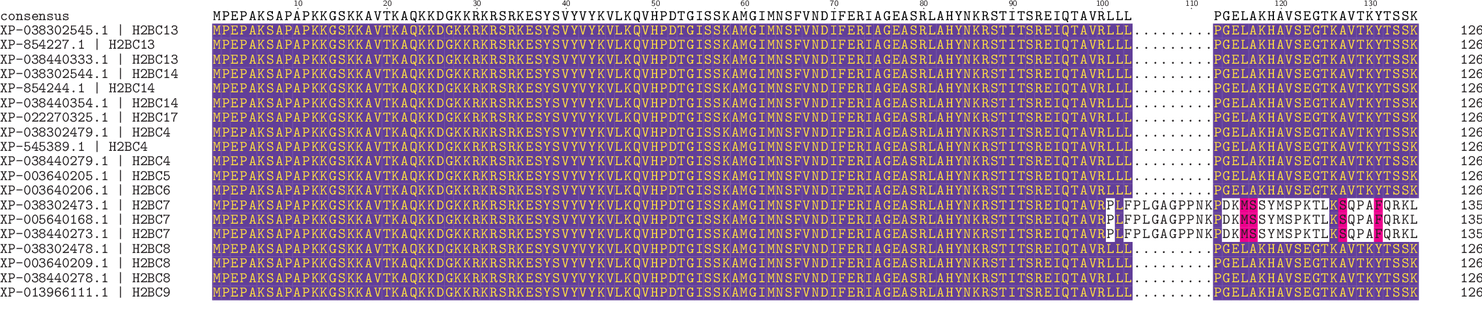

In [38]:
for i, row in genes_vgnc_merged[
    genes_vgnc_merged["symbol"].isin(curate_symbols)
].iterrows():
    if row["symbol"] == "H2BC7":
        genes_vgnc_merged.at[i, "Clustered (canonical) isoform"] = "isoform_7"
        continue
    genes_vgnc_merged.at[i, "Clustered (canonical) isoform"] = "isoform_4"
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(curate_symbols)]

vgnc_id  symbol                      name prev_symbol prev_name  \
182  VGNC:83743  H2BC13  H2B clustered histone 13         NaN       NaN   
183  VGNC:83743  H2BC13  H2B clustered histone 13         NaN       NaN   
184  VGNC:83743  H2BC13  H2B clustered histone 13         NaN       NaN   
185  VGNC:83741  H2BC14  H2B clustered histone 14         NaN       NaN   
186  VGNC:83741  H2BC14  H2B clustered histone 14         NaN       NaN   
187  VGNC:83741  H2BC14  H2B clustered histone 14         NaN       NaN   
194  VGNC:83736  H2BC17  H2B clustered histone 17         NaN       NaN   
220  VGNC:83718   H2BC4   H2B clustered histone 4         NaN       NaN   
221  VGNC:83718   H2BC4   H2B clustered histone 4         NaN       NaN   
222  VGNC:83718   H2BC4   H2B clustered histone 4         NaN       NaN   
223  VGNC:83755   H2BC5   H2B clustered histone 5         NaN       NaN   
224  VGNC:83754   H2BC6   H2B clustered histone 6         NaN       NaN   
225  VGNC:83757   H2BC7   H2B clustered histone 7         NaN       NaN   
226  VGNC:83757   H2BC7   H2B clustered histone 7         NaN       NaN   
227  VGNC:83757   H2BC7   H2B clustered histone 7         NaN       NaN   
228  VGNC:83753   H2BC8   H2B clustered histone 8         NaN       NaN   
229  VGNC:83753   H2BC8   H2B clustered histone 8         NaN       NaN   
230  VGNC:83753   H2BC8   H2B clustered histone 8         NaN       NaN   
231  VGNC:83774   H2BC9   H2B clustered histone 9         NaN       NaN   

       ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
182     611465  ENSCAFG00000045051         NaN                   HGNC:4748   
183     611465  ENSCAFG00000045051         NaN                   HGNC:4748   
184     611465  ENSCAFG00000045051         NaN                   HGNC:4748   
185     611482  ENSCAFG00000044000         NaN                   HGNC:4750   
186     611482  ENSCAFG00000044000         NaN                   HGNC:4750   
187     611482  ENSCAFG00000044000         NaN                   HGNC:4750   
194     608682  ENSCAFG00000043731         NaN                   HGNC:4758   
220     488267  ENSCAFG00000044027         NaN                   HGNC:4757   
221     488267  ENSCAFG00000044027         NaN                   HGNC:4757   
222     488267  ENSCAFG00000044027         NaN                   HGNC:4757   
223  100856099                 NaN         NaN                   HGNC:4747   
224  100856116                 NaN         NaN                   HGNC:4753   
225  102156643                 NaN         NaN                   HGNC:4752   
226  102156643                 NaN         NaN                   HGNC:4752   
227  102156643                 NaN         NaN                   HGNC:4752   
228  100856186  ENSCAFG00000031494         NaN                   HGNC:4746   
229  100856186  ENSCAFG00000031494         NaN                   HGNC:4746   
230  100856186  ENSCAFG00000031494         NaN                   HGNC:4746   
231  106558265  ENSCAFG00000030570         NaN                   HGNC:4755   

    Species  taxon_id       accession  \
182     Dog      9615  XP_038302545.1   
183     Dog      9615     XP_854227.1   
184     Dog      9615  XP_038440333.1   
185     Dog      9615  XP_038302544.1   
186     Dog      9615     XP_854244.1   
187     Dog      9615  XP_038440354.1   
194     Dog      9615  XP_022270325.1   
220     Dog      9615  XP_038302479.1   
221     Dog      9615     XP_545389.1   
222     Dog      9615  XP_038440279.1   
223     Dog      9615  XP_003640205.1   
224     Dog      9615  XP_003640206.1   
225     Dog      9615  XP_038302473.1   
226     Dog      9615  XP_005640168.1   
227     Dog      9615  XP_038440273.1   
228     Dog      9615  XP_038302478.1   
229     Dog      9615  XP_003640209.1   
230     Dog      9615  XP_038440278.1   
231     Dog      9615  XP_013966111.1   

                                              sequence       refseq_id  \
182  MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVL

In [39]:
# Так как isoform_10, 11, 12 удалены, остальные идентификаторы сместим на -3

# Шаг 1: Выбираем только строки с "clustered H2B"
mask = (genes_vgnc_merged["Histone variant"] == "clustered H2B") & (
    ~genes_vgnc_merged["Clustered (canonical) isoform"].isna()
)
clustered_data = genes_vgnc_merged[mask].copy()

# Шаг 2: Создаем словарь для переименования (старый номер → новый номер)
iso_dict = {}
for iso in clustered_data["Clustered (canonical) isoform"].unique():
    num = int(iso.split("_")[1])
    new_num = num - 3 if num >= 13 else num  # Увеличиваем на -3 только если номер ≥ 13
    iso_dict[iso] = f"isoform_{new_num}"

# Шаг 3: Обновляем изоформы в исходной таблице
genes_vgnc_merged.loc[mask, "Clustered (canonical) isoform"] = genes_vgnc_merged.loc[
    mask, "Clustered (canonical) isoform"
].map(iso_dict)

### Return to H2B clustered

In [40]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2B"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
H2BC25 isoform_13 clustered H2B
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
H2BC10 isoform_6 clustered H2B
-----------------------------------------
H2BC10 isoform_5 clustered H2B
-----------------------------------------
H2BC26 isoform_12 clustered H2B
H2BC26 isoform_12 clustered H2B
H2BC26 isoform_12 clustered H2B
-----------------------------------------
H2BC18 isoform_10 clustered H2B
H2BC18 isoform_10 clustered H2B
H2BC18 isoform_10 clustered H2B
-----------------------------------------
H2BC2 isoform_2 clustered H2B
-----------------------------------------
H2BC1 isoform_1 clustered H2B
H2BC1 isoform_1 clustere

### H2BC27

In [42]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC27"])]

vgnc_id  symbol                      name prev_symbol  \
214  VGNC:83744  H2BC27  H2B clustered histone 27      H2BU2    
215  VGNC:83744  H2BC27  H2B clustered histone 27      H2BU2    
216  VGNC:83744  H2BC27  H2B clustered histone 27      H2BU2    

           prev_name    ncbi_id     ensembl_gene_id uniprot_ids  \
214  H2B.U histone 2  100683643  ENSCAFG00000024336      F1P782   
215  H2B.U histone 2  100683643  ENSCAFG00000024336      F1P782   
216  H2B.U histone 2  100683643  ENSCAFG00000024336      F1P782   

    Human gene ortholog HGNC ID Species  taxon_id       accession  \
214                  HGNC:20515     Dog      9615  XP_038541932.1   
215                  HGNC:20515     Dog      9615  XP_003431891.1   
216                  HGNC:20515     Dog      9615  XP_038413451.1   

                                              sequence       refseq_id  \
214  MVDKLSNLTFYPYDASTQGRCPRRAVPPTPAASAPPCPAEPSRSAP...  XP_038541932.1   
215  MVDKLSNLTFYPYDASTQGRCPRRAVPPTPAASAPPCPAEPSRSAP...  XP_003431891.1   
216  MVDKLSNLTFYPYDASTQGRCPRRAVPPTPAASAPPCPAEPSRSAP...  XP_038413451.1   

    HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
214         NaN                           NaN   clustered H2B          H2B   
215         NaN                           NaN   clustered H2B          H2B   
216         NaN                           NaN   clustered H2B          H2B   

    comment  
214     NaN  
215     NaN  
216     NaN

In [50]:
genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
    & (genes_vgnc_merged_clustered["Histone variant"] == "clustered H2B")
]["Clustered (canonical) isoform"].unique()

array(['isoform_1', 'isoform_5', 'isoform_6', 'isoform_8', 'isoform_9',
       'isoform_4', 'isoform_10', 'isoform_11', 'isoform_2', 'isoform_13',
       'isoform_12', nan, 'isoform_3', 'isoform_7'], dtype=object)

### Add new H2B isoform isoform_14

In [51]:
for i, row in genes_vgnc_merged[
    genes_vgnc_merged["symbol"].isin(["H2BC27"])
].iterrows():
    genes_vgnc_merged.at[i, "Clustered (canonical) isoform"] = "isoform_14"
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2BC27"])]

vgnc_id  symbol                      name prev_symbol  \
214  VGNC:83744  H2BC27  H2B clustered histone 27      H2BU2    
215  VGNC:83744  H2BC27  H2B clustered histone 27      H2BU2    
216  VGNC:83744  H2BC27  H2B clustered histone 27      H2BU2    

           prev_name    ncbi_id     ensembl_gene_id uniprot_ids  \
214  H2B.U histone 2  100683643  ENSCAFG00000024336      F1P782   
215  H2B.U histone 2  100683643  ENSCAFG00000024336      F1P782   
216  H2B.U histone 2  100683643  ENSCAFG00000024336      F1P782   

    Human gene ortholog HGNC ID Species  taxon_id       accession  \
214                  HGNC:20515     Dog      9615  XP_038541932.1   
215                  HGNC:20515     Dog      9615  XP_003431891.1   
216                  HGNC:20515     Dog      9615  XP_038413451.1   

                                              sequence       refseq_id  \
214  MVDKLSNLTFYPYDASTQGRCPRRAVPPTPAASAPPCPAEPSRSAP...  XP_038541932.1   
215  MVDKLSNLTFYPYDASTQGRCPRRAVPPTPAASAPPCPAEPSRSAP...  XP_003431891.1   
216  MVDKLSNLTFYPYDASTQGRCPRRAVPPTPAASAPPCPAEPSRSAP...  XP_038413451.1   

    HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
214         NaN                    isoform_14   clustered H2B          H2B   
215         NaN                    isoform_14   clustered H2B          H2B   
216         NaN                    isoform_14   clustered H2B          H2B   

    comment  
214     NaN  
215     NaN  
216     NaN

### Return to H2B clustered

In [52]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2B"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
H2BC25 isoform_13 clustered H2B
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
H2BC10 isoform_6 clustered H2B
-----------------------------------------
H2BC10 isoform_5 clustered H2B
-----------------------------------------
H2BC26 isoform_12 clustered H2B
H2BC26 isoform_12 clustered H2B
H2BC26 isoform_12 clustered H2B
-----------------------------------------
H2BC18 isoform_10 clustered H2B
H2BC18 isoform_10 clustered H2B
H2BC18 isoform_10 clustered H2B
-----------------------------------------
H2BC2 isoform_2 clustered H2B
-----------------------------------------
H2BC1 isoform_1 clustered H2B
H2BC1 isoform_1 clustere

## Focus on H2A clustered

In [53]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2A"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
H2AC14 isoform_7 clustered H2A
H2A

### H2A17

In [55]:
genes_vgnc_merged[
    genes_vgnc_merged["Clustered (canonical) isoform"].isin(["isoform_5"])
]["symbol"].values

array(['H2AC11', 'H2AC11', 'H2AC11', 'H2AC13', 'H2AC13', 'H2AC13',
       'H2AC15', 'H2AC15', 'H2AC15', 'H2AC16', 'H2AC16', 'H2AC16',
       'H2AC17', 'H2AC17', 'H2AC17', 'H2BC10'], dtype=object)

In [56]:
curate_symbols = [
    "H2AC11",
    "H2AC11",
    "H2AC11",
    "H2AC13",
    "H2AC13",
    "H2AC13",
    "H2AC15",
    "H2AC15",
    "H2AC15",
    "H2AC16",
    "H2AC16",
    "H2AC16",
    "H2AC17",
    "H2AC17",
    "H2AC17",
    "H2BC10",
]
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(curate_symbols)]

vgnc_id  symbol                      name prev_symbol prev_name  \
42   VGNC:83722  H2AC11  H2A clustered histone 11         NaN       NaN   
43   VGNC:83722  H2AC11  H2A clustered histone 11         NaN       NaN   
44   VGNC:83722  H2AC11  H2A clustered histone 11         NaN       NaN   
47   VGNC:83724  H2AC13  H2A clustered histone 13         NaN       NaN   
48   VGNC:83724  H2AC13  H2A clustered histone 13         NaN       NaN   
49   VGNC:83724  H2AC13  H2A clustered histone 13         NaN       NaN   
53   VGNC:83759  H2AC15  H2A clustered histone 15         NaN       NaN   
54   VGNC:83759  H2AC15  H2A clustered histone 15         NaN       NaN   
55   VGNC:83759  H2AC15  H2A clustered histone 15         NaN       NaN   
56   VGNC:83727  H2AC16  H2A clustered histone 16         NaN       NaN   
57   VGNC:83727  H2AC16  H2A clustered histone 16         NaN       NaN   
58   VGNC:83727  H2AC16  H2A clustered histone 16         NaN       NaN   
59   VGNC:83730  H2AC17  H2A clustered histone 17         NaN       NaN   
60   VGNC:83730  H2AC17  H2A clustered histone 17         NaN       NaN   
61   VGNC:83730  H2AC17  H2A clustered histone 17         NaN       NaN   
174  VGNC:83721  H2BC10  H2B clustered histone 10         NaN       NaN   
175  VGNC:83721  H2BC10  H2B clustered histone 10         NaN       NaN   

       ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
42      488289  ENSCAFG00000030507      J9P5B1                   HGNC:4737   
43      488289  ENSCAFG00000030507      J9P5B1                   HGNC:4737   
44      488289  ENSCAFG00000030507      J9P5B1                   HGNC:4737   
47      488297  ENSCAFG00000029759      J9P6M9                   HGNC:4725   
48      488297  ENSCAFG00000029759      J9P6M9                   HGNC:4725   
49      488297  ENSCAFG00000029759      J9P6M9                   HGNC:4725   
53   106558234  ENSCAFG00000044066         NaN                   HGNC:4726   
54   106558234  ENSCAFG00000044066         NaN                   HGNC:4726   
55   106558234  ENSCAFG00000044066         NaN                   HGNC:4726   
56      488304  ENSCAFG00000047415  A0A5F4D9T0                   HGNC:4730   
57      488304  ENSCAFG00000047415  A0A5F4D9T0                   HGNC:4730   
58      488304  ENSCAFG00000047415  A0A5F4D9T0                   HGNC:4730   
59      488308  ENSCAFG00000028830         NaN                   HGNC:4735   
60      488308  ENSCAFG00000028830         NaN                   HGNC:4735   
61      488308  ENSCAFG00000028830         NaN                   HGNC:4735   
174     488279  ENSCAFG00000042028  A0A5F4CAF8                   HGNC:4756   
175     488279  ENSCAFG00000042028  A0A5F4CAF8                   HGNC:4756   

    Species  taxon_id       accession  \
42      Dog      9615  XP_038302530.1   
43      Dog      9615  XP_013965993.1   
44      Dog      9615  XP_038440339.1   
47      Dog      9615  XP_038302531.1   
48      Dog      9615  XP_022270322.1   
49      Dog      9615  XP_038440340.1   
53      Dog      9615  XP_038302552.1   
54      Dog      9615  XP_013965992.1   
55      Dog      9615  XP_038440361.1   
56      Dog      9615  XP_038302609.1   
57      Dog      9615  XP_013965973.1   
58      Dog      9615  XP_038440417.1   
59      Dog      9615  XP_038302550.1   
60      Dog      9615  XP_013965994.3   
61      Dog      9615  XP_038440362.1   
174     Dog      9615  XP_038302547.1   
175     Dog      9615  XP_005640223.2   

                                              sequence       refseq_id  \
42   MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYSERVGA...  XP_038302530.1   
43   MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYSERVGA...  XP_013965993.1   
44   MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYSERVGA...  XP_038440339.1   
47   MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_038302531.1   
48   MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_022270322.1   
49   MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_038440340.

Для продукта гена H2AC17 (XP_038302550.1) вероятно съехала рамка считывания:

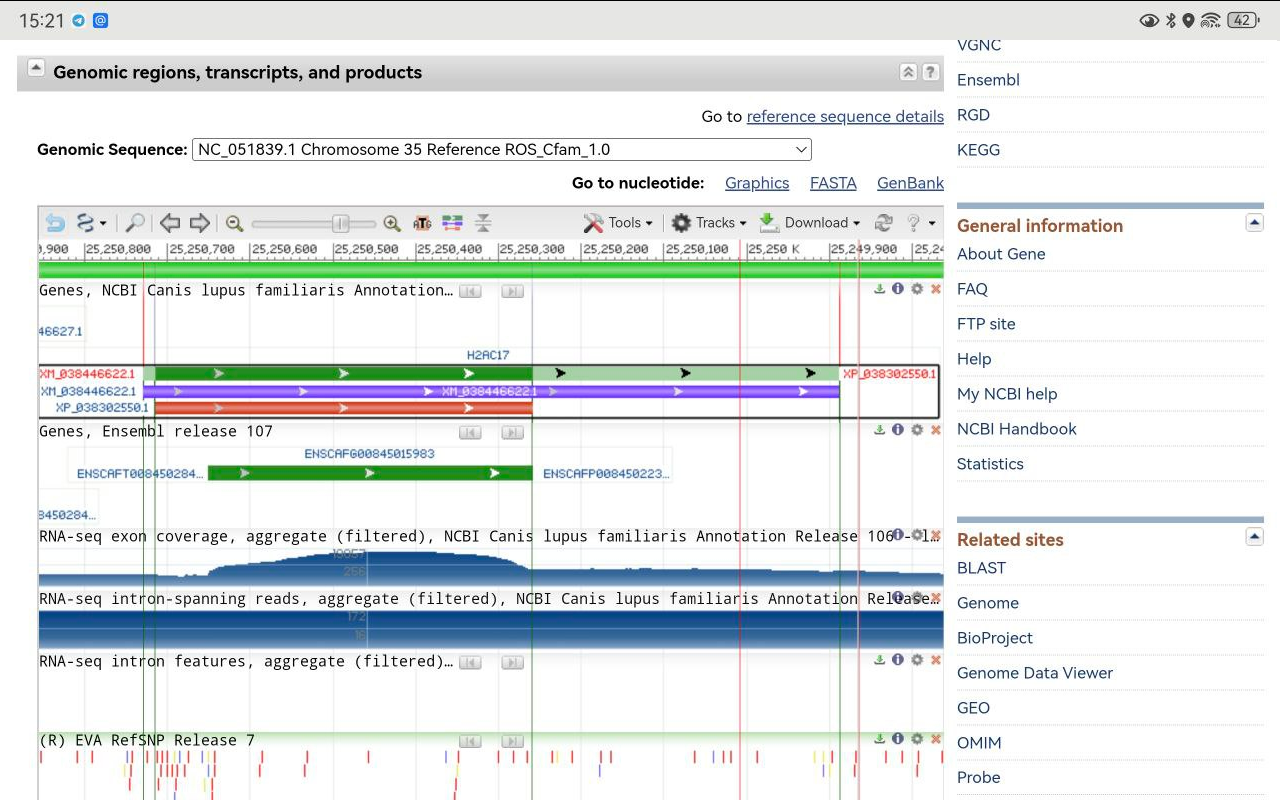

### Cut XP_038302550.1 manually

In [62]:
genes_vgnc_merged.at[59, "sequence"] = genes_vgnc_merged.loc[59, "sequence"][21:]

### Return to H2A clustered

In [63]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2A"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
H2AC14 isoform_7 clustered H2A
H2A

### H2AC9

In [64]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2AC9"])]

vgnc_id symbol                     name prev_symbol prev_name  \
88  VGNC:83770  H2AC9  H2A clustered histone 9         NaN       NaN   

      ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
88  111094037  ENSCAFG00000045621  A0A5F4CVY2                  HGNC:18805   

   Species  taxon_id       accession  \
88     Dog      9615  NP_001361454.2   

                                             sequence       refseq_id  \
88  MSGRGKQGGKARAKAKMRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  NP_001361454.2   

   HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
88         NaN                           NaN   clustered H2A          H2A   

   comment  
88     NaN

### Add new H2A isoform isoform_5

In [65]:
# Шаг 1: Выбираем только строки с "clustered H2B"
mask = (genes_vgnc_merged["Histone variant"] == "clustered H2A") & (
    ~genes_vgnc_merged["Clustered (canonical) isoform"].isna()
)
clustered_data = genes_vgnc_merged[mask].copy()

# Шаг 2: Создаем словарь для переименования (старый номер → новый номер)
iso_dict = {}
for iso in clustered_data["Clustered (canonical) isoform"].unique():
    num = int(iso.split("_")[1])
    new_num = num + 1 if num >= 5 else num  # Увеличиваем на +1 только если номер ≥ 5
    iso_dict[iso] = f"isoform_{new_num}"

# Шаг 3: Обновляем изоформы в исходной таблице
genes_vgnc_merged.loc[mask, "Clustered (canonical) isoform"] = genes_vgnc_merged.loc[
    mask, "Clustered (canonical) isoform"
].map(iso_dict)

In [66]:
genes_vgnc_merged.at[88, "Clustered (canonical) isoform"] = "isoform_5"
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2AC9"])]

vgnc_id symbol                     name prev_symbol prev_name  \
88  VGNC:83770  H2AC9  H2A clustered histone 9         NaN       NaN   

      ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
88  111094037  ENSCAFG00000045621  A0A5F4CVY2                  HGNC:18805   

   Species  taxon_id       accession  \
88     Dog      9615  NP_001361454.2   

                                             sequence       refseq_id  \
88  MSGRGKQGGKARAKAKMRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  NP_001361454.2   

   HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
88         NaN                     isoform_5   clustered H2A          H2A   

   comment  
88     NaN

### Return to H2A clustered

In [67]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2A"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
H2AC14 isoform_8 clustered H2A
H2A

### H2AC14

In [68]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2AC14"])]

vgnc_id  symbol                      name prev_symbol prev_name  \
50  VGNC:83742  H2AC14  H2A clustered histone 14         NaN       NaN   
51  VGNC:83742  H2AC14  H2A clustered histone 14         NaN       NaN   
52  VGNC:83742  H2AC14  H2A clustered histone 14         NaN       NaN   

    ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
50   611231  ENSCAFG00000029078      J9P2B7                   HGNC:4727   
51   611231  ENSCAFG00000029078      J9P2B7                   HGNC:4727   
52   611231  ENSCAFG00000029078      J9P2B7                   HGNC:4727   

   Species  taxon_id       accession  \
50     Dog      9615  XP_038302527.1   
51     Dog      9615  XP_022270324.1   
52     Dog      9615  XP_038440336.1   

                                             sequence       refseq_id  \
50  MRFSELTCTVATLDKRYWQLEMSGRGKQGGKARAKAKTRSSRAGLQ...  XP_038302527.1   
51  MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_022270324.1   
52  MRFSELTCTVATLDKRYWQLEMSGRGKQGGKARAKAKTRSSRAGLQ...  XP_038440336.1   

   HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
50      H2AC14                     isoform_8   clustered H2A          H2A   
51      H2AC14                     isoform_8   clustered H2A          H2A   
52      H2AC14                     isoform_8   clustered H2A          H2A   

   comment  
50     NaN  
51     NaN  
52     NaN

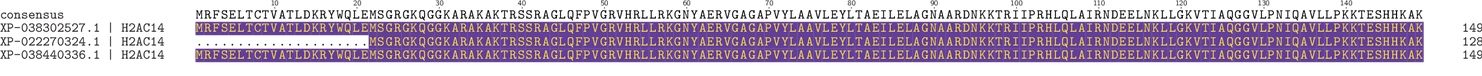

**Похоже, что у XP_038302527.1 и XP_038440336.1 съехала рамка считывания:**

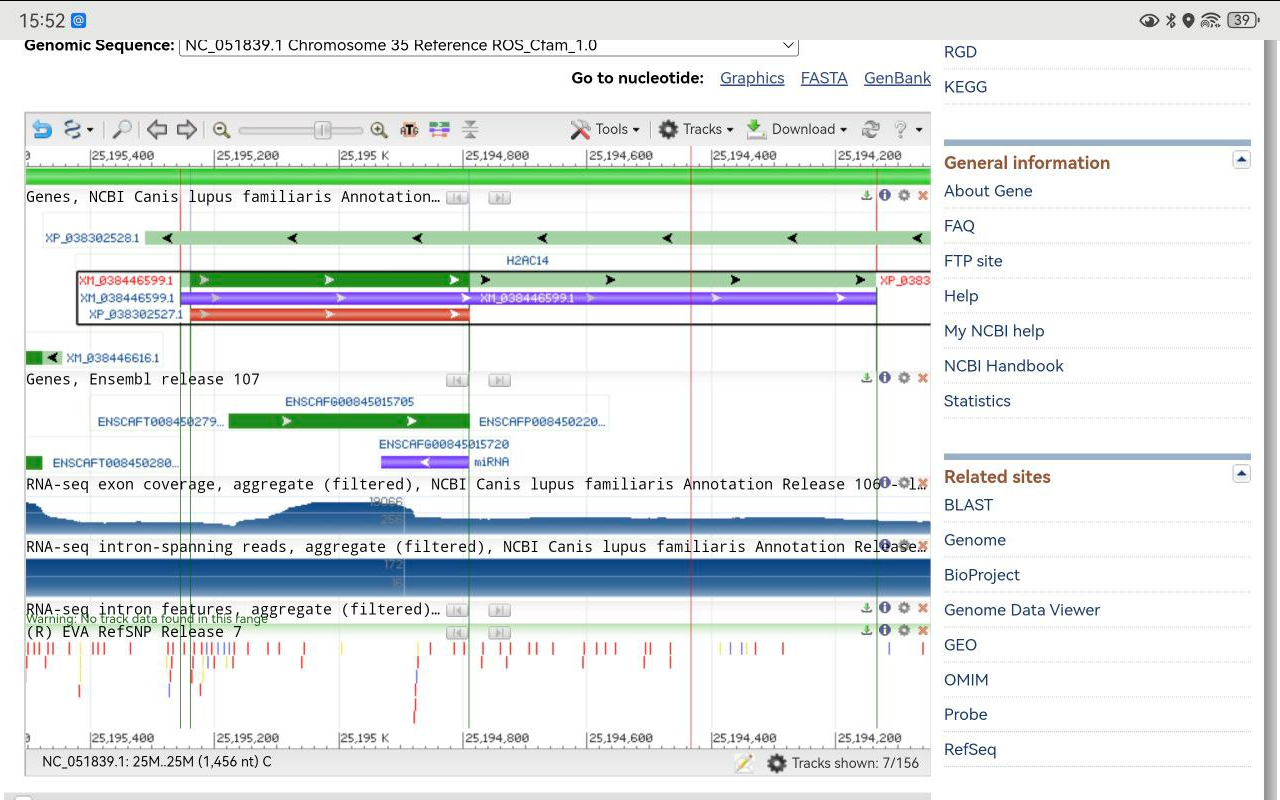

### Cut XP_038302527.1 & XP_038440336.1 manually

In [70]:
genes_vgnc_merged.at[50, "sequence"] = genes_vgnc_merged.loc[50, "sequence"][21:]
genes_vgnc_merged.at[52, "sequence"] = genes_vgnc_merged.loc[52, "sequence"][21:]
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2AC14"])]

vgnc_id  symbol                      name prev_symbol prev_name  \
50  VGNC:83742  H2AC14  H2A clustered histone 14         NaN       NaN   
51  VGNC:83742  H2AC14  H2A clustered histone 14         NaN       NaN   
52  VGNC:83742  H2AC14  H2A clustered histone 14         NaN       NaN   

    ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
50   611231  ENSCAFG00000029078      J9P2B7                   HGNC:4727   
51   611231  ENSCAFG00000029078      J9P2B7                   HGNC:4727   
52   611231  ENSCAFG00000029078      J9P2B7                   HGNC:4727   

   Species  taxon_id       accession  \
50     Dog      9615  XP_038302527.1   
51     Dog      9615  XP_022270324.1   
52     Dog      9615  XP_038440336.1   

                                             sequence       refseq_id  \
50  MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_038302527.1   
51  MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_022270324.1   
52  MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_038440336.1   

   HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
50      H2AC14                     isoform_8   clustered H2A          H2A   
51      H2AC14                     isoform_8   clustered H2A          H2A   
52      H2AC14                     isoform_8   clustered H2A          H2A   

   comment  
50     NaN  
51     NaN  
52     NaN

### Return to H2A clustered

In [71]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2A"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
----------------------------------

### H2AC1

In [72]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2AC1"])]

vgnc_id symbol                     name prev_symbol prev_name  ncbi_id  \
38  VGNC:83710  H2AC1  H2A clustered histone 1         NaN       NaN   488251   
39  VGNC:83710  H2AC1  H2A clustered histone 1         NaN       NaN   488251   
40  VGNC:83710  H2AC1  H2A clustered histone 1         NaN       NaN   488251   

       ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID Species  \
38  ENSCAFG00000024315      F1P7D1                  HGNC:18729     Dog   
39  ENSCAFG00000024315      F1P7D1                  HGNC:18729     Dog   
40  ENSCAFG00000024315      F1P7D1                  HGNC:18729     Dog   

    taxon_id       accession  \
38      9615  XP_038302442.1   
39      9615     XP_545373.2   
40      9615  XP_038440237.1   

                                             sequence       refseq_id  \
38  MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_038302442.1   
39  MTSVQPQRYSSLVPALTAPLSRLRRVTERRSSVGRAVFIGTALQSA...     XP_545373.2   
40  MSGRGKQGGKARAKAKTRSSQGRACQFPVGRVHRLLRKGNYAERVG...  XP_038440237.1   

   HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
38       H2AC1                     isoform_1   clustered H2A          H2A   
39       H2AC1                     isoform_1   clustered H2A          H2A   
40       H2AC1                     isoform_1   clustered H2A          H2A   

   comment  
38     NaN  
39     NaN  
40     NaN

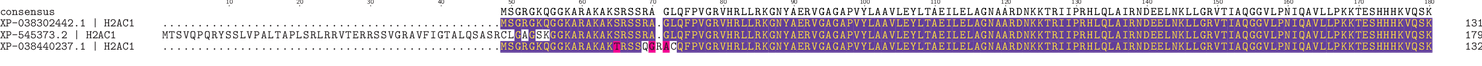

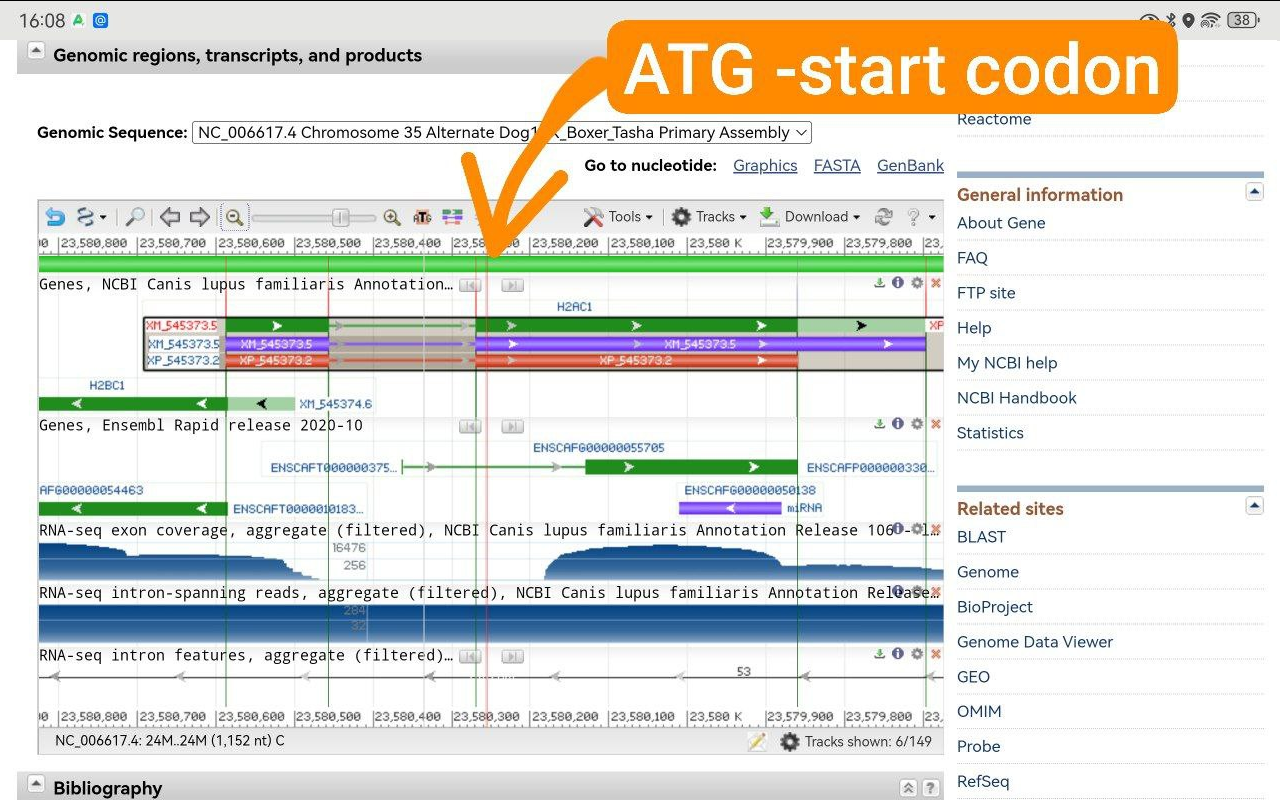

### Delete XP_545373.2 due to low quality

In [74]:
genes_vgnc_merged = genes_vgnc_merged[genes_vgnc_merged["accession"]!="XP_545373.2"]

In [75]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2AC1"])]

vgnc_id symbol                     name prev_symbol prev_name  ncbi_id  \
38  VGNC:83710  H2AC1  H2A clustered histone 1         NaN       NaN   488251   
40  VGNC:83710  H2AC1  H2A clustered histone 1         NaN       NaN   488251   

       ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID Species  \
38  ENSCAFG00000024315      F1P7D1                  HGNC:18729     Dog   
40  ENSCAFG00000024315      F1P7D1                  HGNC:18729     Dog   

    taxon_id       accession  \
38      9615  XP_038302442.1   
40      9615  XP_038440237.1   

                                             sequence       refseq_id  \
38  MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_038302442.1   
40  MSGRGKQGGKARAKAKTRSSQGRACQFPVGRVHRLLRKGNYAERVG...  XP_038440237.1   

   HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
38       H2AC1                     isoform_1   clustered H2A          H2A   
40       H2AC1                     isoform_1   clustered H2A          H2A   

   comment  
38     NaN  
40     NaN

### Add new H2A isoform isoform_2

In [76]:
# Шаг 1: Выбираем только строки с "clustered H2A"
mask = (genes_vgnc_merged["Histone variant"] == "clustered H2A") & (
    ~genes_vgnc_merged["Clustered (canonical) isoform"].isna()
)
clustered_data = genes_vgnc_merged[mask].copy()

# Шаг 2: Создаем словарь для переименования (старый номер → новый номер)
iso_dict = {}
for iso in clustered_data["Clustered (canonical) isoform"].unique():
    num = int(iso.split("_")[1])
    new_num = num + 1 if num >= 2 else num  # Увеличиваем на +1 только если номер ≥ 2
    iso_dict[iso] = f"isoform_{new_num}"

# Шаг 3: Обновляем изоформы в исходной таблице
genes_vgnc_merged.loc[mask, "Clustered (canonical) isoform"] = genes_vgnc_merged.loc[
    mask, "Clustered (canonical) isoform"
].map(iso_dict)

In [77]:
genes_vgnc_merged.at[40, "Clustered (canonical) isoform"] = "isoform_2"
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2AC1"])]

vgnc_id symbol                     name prev_symbol prev_name  ncbi_id  \
38  VGNC:83710  H2AC1  H2A clustered histone 1         NaN       NaN   488251   
40  VGNC:83710  H2AC1  H2A clustered histone 1         NaN       NaN   488251   

       ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID Species  \
38  ENSCAFG00000024315      F1P7D1                  HGNC:18729     Dog   
40  ENSCAFG00000024315      F1P7D1                  HGNC:18729     Dog   

    taxon_id       accession  \
38      9615  XP_038302442.1   
40      9615  XP_038440237.1   

                                             sequence       refseq_id  \
38  MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_038302442.1   
40  MSGRGKQGGKARAKAKTRSSQGRACQFPVGRVHRLLRKGNYAERVG...  XP_038440237.1   

   HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
38       H2AC1                     isoform_1   clustered H2A          H2A   
40       H2AC1                     isoform_2   clustered H2A          H2A   

   comment  
38     NaN  
40     NaN

### Return to H2A clustered

In [78]:
genes_vgnc_merged_clustered = genes_vgnc_merged[
    genes_vgnc_merged["Histone variant"].str.startswith("clustered", na=False)
]
for _, group in genes_vgnc_merged_clustered[
    ~genes_vgnc_merged_clustered["sequence"].isna()
].groupby("sequence"):
    print("-----------------------------------------")
    for s, f, v in zip(
        group["symbol"].values,
        group["Clustered (canonical) isoform"].values,
        group["Histone variant"].values,
    ):
        if v.startswith("clustered H2A"):
            print(s, f, v)

-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
----------------------------------

### H2AC18 & H2AC19

In [79]:
genes_vgnc_merged[genes_vgnc_merged["symbol"].isin(["H2AC18", "H2AC19"])]

vgnc_id  symbol                      name prev_symbol prev_name  \
62  VGNC:83737  H2AC18  H2A clustered histone 18         NaN       NaN   
63  VGNC:83704  H2AC19  H2A clustered histone 19         NaN       NaN   

    ncbi_id     ensembl_gene_id uniprot_ids Human gene ortholog HGNC ID  \
62   608631  ENSCAFG00000043458      J9P0L5                   HGNC:4736   
63   483168                 NaN         NaN                  HGNC:29668   

   Species  taxon_id    accession  \
62     Dog      9615  XP_850808.1   
63     Dog      9615  XP_540286.2   

                                             sequence    refseq_id  \
62  MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGA...          NaN   
63  MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGA...  XP_540286.2   

   HGNC symbol Clustered (canonical) isoform Histone variant Histone type  \
62      H2AC18                    isoform_10   clustered H2A          H2A   
63      H2AC19                    isoform_10   clustered H2A          H2A   

                              comment  
62  not in current annotation release  
63                                NaN